In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot # Calcula a distribuição dos erros residuais de uma distribuição

In [23]:
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [24]:
base.drop('Unnamed: 0', axis = 1, inplace=True)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [25]:
X = base.iloc[:,1].values
Y = base.iloc[:,0].values # Retorna um array de valores

In [26]:
Y

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25])

# Fórmula de Correlação

A fórmula de correlação de Pearson é:

$$
\rho(X, Y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$



In [27]:
#Calculo da correlção de X e Y
correlacao = np.corrcoef(X,Y)
correlacao
# [[Speed and Speed, Speed and Dist],
#  [Dist and speed, Dist and Dist]]

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [28]:
#Formato de matrix com uma coluna
X = X.reshape(-1,1)
# Criação do modelo e treinamento(fit indica que o treinamento deve ser executado)
modelo = LinearRegression() #Instânciando o modelo da regressão linear
modelo.fit(X,Y) # Treinamento

LinearRegression()

In [30]:
modelo.intercept_
# O intercept é aonde a minha linha encontra o eixo Y

8.283905641787172

In [33]:
modelo.coef_
#inclinação positiva ou negativa

array([0.16556757])

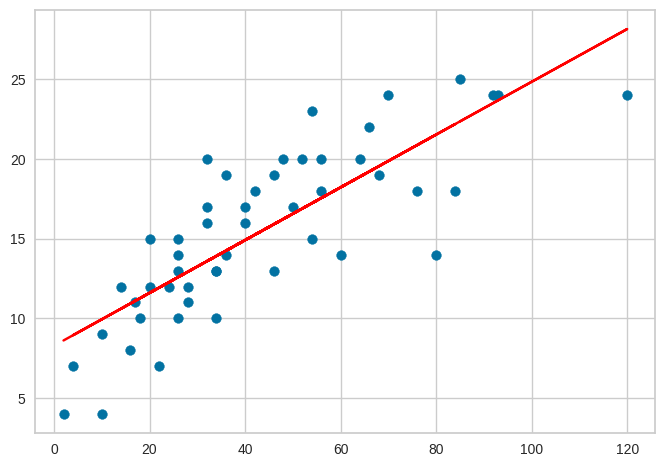

In [35]:
plt.scatter(X,Y)
plt.plot(X, modelo.predict(X), color='red')

In [41]:
modelo.predict([[22]])
#Previsão usando o modelo

array([11.92639228])

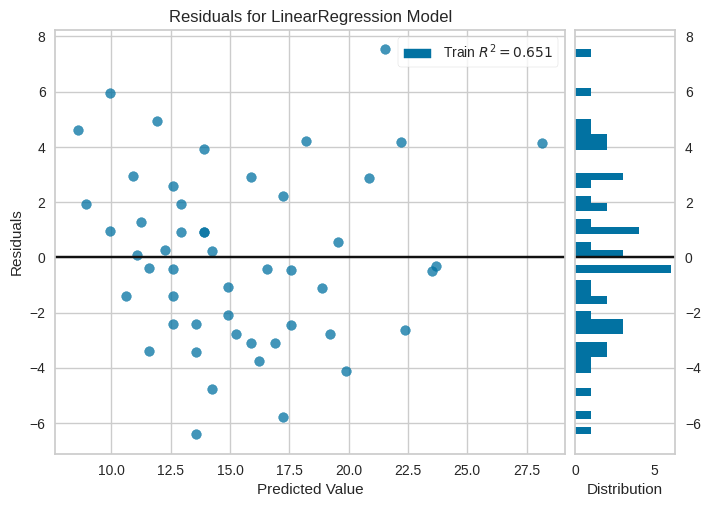

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X,Y)
visualizador.show()# Visualizando o gráfico